<h1 style="color:green;">CNN_Image_Classification_TensorFlow</h1>

<h3 style="color:blue;">We will predict the category of a fruit image.</h3>

<p>
<strong>
1. Make the code work (while the code was provided, each of those notebooks have packages that may need to be installed to get the code to work).
</strong>
</p>

In [1]:
# Import libraries
from __future__ import print_function
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
import os

In [2]:
# Use ImageDataGenerator to feed image files from directories
train_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Create a training data generator to feed training images from directories
train_generator = train_datagen.flow_from_directory(
    directory="FRUITS/Training32",
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 12642 images belonging to 25 classes.


In [5]:
valid_generator = valid_datagen.flow_from_directory(
    directory="FRUITS/Test32",
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 4232 images belonging to 25 classes.


In [6]:
# Model Architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(25))
model.add(Activation('softmax'))

model.summary()

# initiate adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Let's train the model using adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [7]:
# Model fit
hist = model.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=5,
        validation_data=valid_generator,
        validation_steps=25)

Epoch 1/5
25/25 [==============================] - 12s 453ms/step - loss: 3.1811 - accuracy: 0.0659 - val_loss: 3.1210 - val_accuracy: 0.0803
Epoch 2/5
25/25 [==============================] - 9s 368ms/step - loss: 3.0104 - accuracy: 0.1274 - val_loss: 2.7670 - val_accuracy: 0.2853
Epoch 3/5
25/25 [==============================] - 6s 260ms/step - loss: 2.4749 - accuracy: 0.2883 - val_loss: 1.9281 - val_accuracy: 0.5147
Epoch 4/5
25/25 [==============================] - 6s 254ms/step - loss: 1.8229 - accuracy: 0.4319 - val_loss: 1.3948 - val_accuracy: 0.5772
Epoch 5/5
25/25 [==============================] - 6s 236ms/step - loss: 1.4376 - accuracy: 0.5404 - val_loss: 1.1134 - val_accuracy: 0.6837


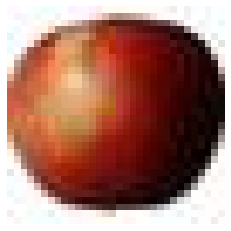

In [8]:
# Displaying the selected image
img = load_img("FRUITS/Test32/Apple Braeburn/3_100.jpg", target_size=(32,32))
plt.imshow(img)
plt.axis("off")
plt.show()

# Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load("FRUITS/Test32/Apple Braeburn/3_100.jpg")

In [9]:
# Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

[0]


In [10]:
# Printing class dictionary
label_mapper = (valid_generator.class_indices)
label_mapper

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow': 9,
 'Apricot': 10,
 'Avocado': 11,
 'Avocado ripe': 12,
 'Banana': 13,
 'Banana Red': 14,
 'Cactus fruit': 15,
 'Cantaloupe 1': 16,
 'Cantaloupe 2': 17,
 'Carambula': 18,
 'Cherry 1': 19,
 'Cherry 2': 20,
 'Cherry Rainier': 21,
 'Cherry Wax Black': 22,
 'Cherry Wax Red': 23,
 'Cherry Wax Yellow': 24}

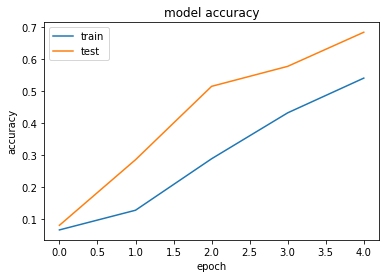

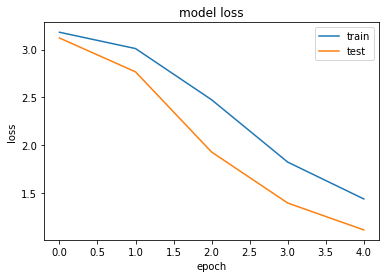

In [11]:
# Summarize history for accuracy
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
# # Save the accuracy plot
#plt.savefig("CNN_model_2-acc.png")
plt.show() # Display  the plot

# Summarize history for accuracy
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
# # Save the accuracy plot
# plt.savefig("CNN_model_2-acc.png")
plt.show() # Display  the plot

<p>
<strong>
2. Make any change in the code that makes sense and run it again. Explain the change you are making, how exactly the code needs to be modified for the change, and then interpret the results you got after the change. The "change" itself could mean a few things (a) possibly using a different dataset to see what happens (b) keeping the same dataset but creating a significantly different architecture ("significantly" here means simply changing the size (neurons) of one layer for example wouldn't count).
</strong>
</p>

<p>
<b> Data Source: </b> https://www.kaggle.com/moltean/fruits
</p>

In [12]:
# Use ImageDataGenerator to feed image files from directories
train_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Create a training data generator to feed training images from directories
train_generator = train_datagen.flow_from_directory(
    directory="fruits360/Training",
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 67692 images belonging to 131 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    directory="fruits360/Test",
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 22688 images belonging to 131 classes.


<p>
<strong>
Adam Optimizer
</strong>
</p>

In [16]:
# Model Architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100,100,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(131))
model.add(Activation('softmax'))

model.summary()

# initiate adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Let's train the model using adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 49, 32)        0         
                                                      

In [17]:
# Model fit
history = model.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=25,
        validation_data=test_generator,
        validation_steps=25)

Epoch 1/25
25/25 [==============================] - 52s 2s/step - loss: 4.8548 - accuracy: 0.0128 - val_loss: 4.8344 - val_accuracy: 0.0259
Epoch 2/25
25/25 [==============================] - 47s 2s/step - loss: 4.7104 - accuracy: 0.0331 - val_loss: 4.6262 - val_accuracy: 0.0953
Epoch 3/25
25/25 [==============================] - 48s 2s/step - loss: 4.3660 - accuracy: 0.0656 - val_loss: 4.1336 - val_accuracy: 0.1466
Epoch 4/25
25/25 [==============================] - 49s 2s/step - loss: 3.9636 - accuracy: 0.1109 - val_loss: 3.6470 - val_accuracy: 0.2425
Epoch 5/25
25/25 [==============================] - 51s 2s/step - loss: 3.5209 - accuracy: 0.1722 - val_loss: 3.1311 - val_accuracy: 0.2872
Epoch 6/25
25/25 [==============================] - 50s 2s/step - loss: 3.1518 - accuracy: 0.2309 - val_loss: 2.6297 - val_accuracy: 0.4256
Epoch 7/25
25/25 [==============================] - 50s 2s/step - loss: 2.7095 - accuracy: 0.3187 - val_loss: 2.2218 - val_accuracy: 0.4809
Epoch 8/25
25/25 [==

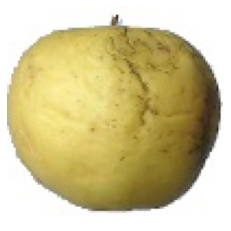

In [18]:
# Displaying the selected image
img = load_img("fruits360/Training/Apple Golden 1/3_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

# Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load("fruits360/Training/Apple Golden 1/3_100.jpg")

In [19]:
# Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

[2]


In [20]:
# Printing class dictionary
label_mapper = (test_generator.class_indices)
label_mapper

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

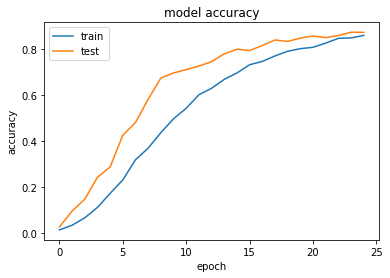

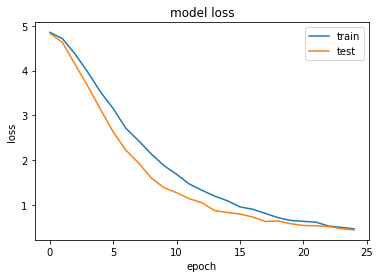

In [21]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
# # Save the accuracy plot
#plt.savefig("CNN_model_2-acc.png")
plt.show() # Display  the plot

# Summarize history for accuracy
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
# # Save the accuracy plot
#plt.savefig("CNN_model_2-acc.png")
plt.show() # Display  the plot

<p>
<strong>
RMSProp Optimizer
</strong>
</p>

In [22]:
# Model Architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100,100,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(131))
model.add(Activation('softmax'))

model.summary()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 100, 100, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 49, 49, 32)        0         
                                                      

In [23]:
# Model fit
history = model.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=25,
        validation_data=test_generator,
        validation_steps=25)

Epoch 1/25
25/25 [==============================] - 52s 2s/step - loss: 4.9689 - accuracy: 0.0309 - val_loss: 4.3157 - val_accuracy: 0.0753
Epoch 2/25
25/25 [==============================] - 53s 2s/step - loss: 4.0402 - accuracy: 0.1103 - val_loss: 3.5169 - val_accuracy: 0.1550
Epoch 3/25
25/25 [==============================] - 51s 2s/step - loss: 2.9408 - accuracy: 0.2739 - val_loss: 2.1196 - val_accuracy: 0.5122
Epoch 4/25
25/25 [==============================] - 51s 2s/step - loss: 2.0563 - accuracy: 0.4603 - val_loss: 1.5893 - val_accuracy: 0.6187
Epoch 5/25
25/25 [==============================] - 50s 2s/step - loss: 1.6187 - accuracy: 0.5666 - val_loss: 1.1514 - val_accuracy: 0.7184
Epoch 6/25
25/25 [==============================] - 53s 2s/step - loss: 1.1463 - accuracy: 0.6844 - val_loss: 0.9038 - val_accuracy: 0.7672
Epoch 7/25
25/25 [==============================] - 56s 2s/step - loss: 0.8930 - accuracy: 0.7547 - val_loss: 0.6772 - val_accuracy: 0.8250
Epoch 8/25
25/25 [==

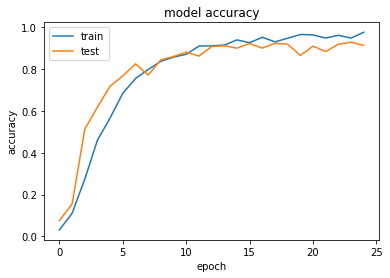

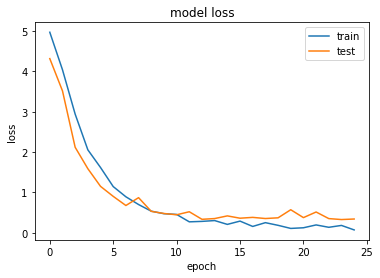

In [24]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
# # Save the accuracy plot
#plt.savefig("CNN_model_2-acc.png")
plt.show() # Display  the plot

# Summarize history for accuracy
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
# # Save the accuracy plot
#plt.savefig("CNN_model_2-acc.png")
plt.show() # Display  the plot

<p>
<strong>
The changes I made to the original file are as follows:
    <ol>
        <li>Changed the dataset(Linked above).</li>
        <li>Changed the optimizer to 'rmsprop'.</li>
        <li>Increased the epochs to 25.</li>
        <li>Added the plots for loss and accuracy.</li>
    </ol>
<br>    
The code needs to be modified at the following stages:
    <ol>
        <li>Modified the path for train and test sets.</li>
        <li>Changed the optimzer in the layers block.</li>
        <li>Increased epochs value when fitting the model.</li>
        <li>Plots for loss and accuracy are added at the end scaled by epochs where fitted model is passed as input.</li>
    </ol>
<br>
Interpretation:
<br>
In the first question, where we are predicting the category of a fruit image, there is a steady increase in accuracy for the train and test splits by epochs. There is a steady decrease in loss for the train and test splits by epochs.
Accuracy: 68%, Classes: 25.
    
In the second question, where we are again predicting the category of a fruit image (A different dataset taken from kaggle), with both adam and RMSProp optimizers, there is a steep increase in accuracy for the train and test splits by epochs. There is a steep decrease in loss for the train and test splits by epochs. But the accuracy is higher with RMSProp as it converges to minima more quicker than Adam. So, the best model in this case is with the RMSProp optimizer.
Accuracy: 87%, Classes: 131 with Adam.
Accuracy: 91%, Classes: 131 with RMSProp.
</strong>    
</p>